# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.pandas.set_option("display.max_columns", None)

In [3]:
nba = pd.read_csv("nba_2013.csv")

In [4]:
print(nba.shape)

(481, 31)


In [5]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


# preprocessing steps

In [6]:
nba.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [7]:
nba["pos"].value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64

In [8]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [9]:
nba.isnull().sum()/len(nba)*100

player           0.000000
pos              0.000000
age              0.000000
bref_team_id     0.000000
g                0.000000
gs               0.000000
mp               0.000000
fg               0.000000
fga              0.000000
fg.              0.415800
x3p              0.000000
x3pa             0.000000
x3p.            13.929314
x2p              0.000000
x2pa             0.000000
x2p.             0.623701
efg.             0.415800
ft               0.000000
fta              0.000000
ft.              4.158004
orb              0.000000
drb              0.000000
trb              0.000000
ast              0.000000
stl              0.000000
blk              0.000000
tov              0.000000
pf               0.000000
pts              0.000000
season           0.000000
season_end       0.000000
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x3p.', ylabel='Density'>

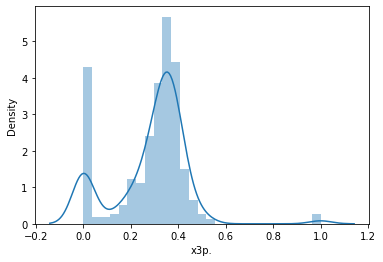

In [10]:
sns.distplot(nba["x3p."])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ft.', ylabel='Density'>

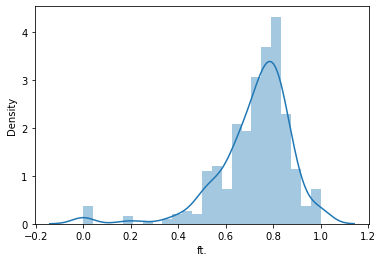

In [11]:
sns.distplot(nba["ft."])

In [12]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,481.000000,481.000000,478.000000,479.000000,481.000000,481.000000,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.466947,0.480752,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,147.223161,294.174554,0.104448,0.099552,103.667725,131.240639,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,31.000000,67.000000,0.434719,0.451000,16.000000,22.000000,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,110.000000,227.000000,0.474475,0.488000,53.000000,73.000000,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,230.000000,459.000000,0.513729,0.526000,126.000000,179.000000,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


# imputation with median values

In [13]:
nba["x3p."].fillna(nba["x3p."].median(),inplace=True)
nba["ft."].fillna(nba["ft."].median(),inplace=True)

In [14]:
nba.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             2
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            3
efg.            2
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [15]:
nba.dropna()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,0.330976,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,0.330976,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,40,188,0.212766,305,620,0.491935,0.452,209,326,0.641,69,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,135,350,0.385714,252,539,0.467532,0.511,235,285,0.825,29,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,90,292,0.308219,492,991,0.496468,0.489,163,229,0.712,166,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,0,1,0.000000,172,403,0.426799,0.426,146,200,0.730,118,235,353,92,40,41,87,170,490,2013-2014,2013


In [16]:
nba.drop('season', inplace=True, axis=1)
nba.drop('season_end', inplace=True, axis=1)

# deviding category and numerical variables

In [17]:
df_cat = nba.select_dtypes(include="object")
df_num = nba.select_dtypes(exclude="object")

In [18]:
df_cat.head()

,player,pos,bref_team_id
0,Quincy Acy,SF,TOT
1,Steven Adams,C,OKC
2,Jeff Adrien,PF,TOT
3,Arron Afflalo,SG,ORL
4,Alexis Ajinca,C,NOP


In [19]:
df_num.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,0.330976,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,0.330976,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328


In [20]:
df_cat.dtypes

player          object
pos             object
bref_team_id    object
dtype: object

In [21]:
df_num.dtypes

age       int64
g         int64
gs        int64
mp        int64
fg        int64
fga       int64
fg.     float64
x3p       int64
x3pa      int64
x3p.    float64
x2p       int64
x2pa      int64
x2p.    float64
efg.    float64
ft        int64
fta       int64
ft.     float64
orb       int64
drb       int64
trb       int64
ast       int64
stl       int64
blk       int64
tov       int64
pf        int64
pts       int64
dtype: object

In [22]:
df_num=df_num.dropna()

In [38]:
df_num.isnull().sum()

age     0
g       0
gs      0
mp      0
fg      0
fga     0
fg.     0
x3p     0
x3pa    0
x3p.    0
x2p     0
x2pa    0
x2p.    0
efg.    0
ft      0
fta     0
ft.     0
orb     0
drb     0
trb     0
ast     0
stl     0
blk     0
tov     0
pf      0
pts     0
dtype: int64

In [39]:
df_num = df_num.drop("pts", axis=1)

In [40]:
df_num.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,23,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122
1,20,81,20,1197,93,185,0.503,0,0,0.330976,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203
2,27,53,12,961,143,275,0.520,0,0,0.330976,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136
4,25,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187


# scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [46]:
sc = StandardScaler()
df_num_1 = sc.fit_transform(df_num)

In [47]:
df_num_1

array([[-0.83215011,  0.37641154, -0.8678397 , ...,  0.0565006 ,
        -0.6761161 ,  0.21831388],
       [-1.54755973,  1.09435544, -0.19332364, ...,  1.06036867,
        -0.02092804,  1.36118526],
       [ 0.12172939, -0.02244618, -0.46313006, ...,  0.38032901,
        -0.53229433,  0.02078055],
       ...,
       [-0.35521036,  1.0145839 ,  1.76277292, ...,  0.38032901,
         1.48121044,  1.50228049],
       [-1.30908986,  1.13424121, -0.76666229, ...,  0.54224322,
         0.23475511,  0.89557099],
       [-0.59368023,  0.65561195, -0.56430747, ...,  0.44509469,
        -0.1967102 ,  0.42995673]])

In [50]:
df_num_sc = pd.DataFrame(df_num_1, index = df_num.index, columns=df_num.columns)

In [52]:
df_num_sc.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,-0.832150,0.376412,-0.867840,-0.445185,-0.746789,-0.777289,0.321371,-0.704858,-0.721724,-0.164781,-0.627300,-0.647895,0.240720,0.018340,-0.547798,-0.521407,-0.401482,0.255167,-0.136649,-0.019934,-0.650641,-0.475881,0.056501,-0.676116,0.218314
1,-1.547560,1.094355,-0.193324,-0.053674,-0.589369,-0.657754,0.676235,-0.783491,-0.834717,0.272537,-0.416454,-0.447029,0.342689,0.230921,-0.123238,0.111356,-0.905613,1.382877,0.180396,0.559963,-0.536135,0.013738,1.060369,-0.020928,1.361185
2,0.121729,-0.022446,-0.463130,-0.317665,-0.297850,-0.413251,0.848597,-0.783491,-0.834717,0.272537,-0.076381,-0.140624,0.508470,0.403011,-0.152185,-0.018246,-0.535491,0.738471,0.276888,0.429986,-0.574303,-0.447080,0.380329,-0.532294,0.020781
3,0.360199,0.775269,1.594144,1.462033,1.573703,1.586240,0.230121,1.732760,1.425151,0.923248,1.236301,1.343737,0.053927,0.423256,1.758335,1.636087,0.587637,-0.389238,0.456087,0.210025,1.028782,-0.130268,-0.688305,1.177587,0.415847
4,-0.355210,0.097211,0.143934,-0.328851,-0.338662,-0.483885,1.112210,-0.783491,-0.827184,-1.978163,-0.123992,-0.232546,0.780538,0.666206,-0.345167,-0.414676,0.721647,0.609590,0.132150,0.285012,-0.559036,-0.475881,0.704157,-0.148770,1.135433


In [54]:
df_cat_dum = pd.get_dummies(df_cat)

In [55]:
df_cat_dum.head()

,player_A.J. Price,player_Aaron Brooks,player_Aaron Gray,player_Adonis Thomas,player_Al Harrington,player_Al Horford,player_Al Jefferson,player_Al-Farouq Aminu,player_Alan Anderson,player_Alec Burks,player_Alex Len,player_Alexey Shved,player_Alexis Ajinca,player_Allen Crabbe,player_Alonzo Gee,player_Amar'e Stoudemire,player_Amir Johnson,player_Anderson Varejao,player_Andray Blatche,player_Andre Drummond,player_Andre Iguodala,player_Andre Miller,player_Andre Roberson,player_Andrea Bargnani,player_Andrei Kirilenko,player_Andrew Bogut,player_Andrew Bynum,player_Andrew Nicholson,player_Andris Biedrins,player_Antawn Jamison,player_Anthony Bennett,player_Anthony Davis,player_Anthony Morrow,player_Anthony Randolph,player_Anthony Tolliver,player_Archie Goodwin,player_Arinze Onuaku,player_Arnett Moultrie,player_Aron Baynes,player_Arron Afflalo,player_Austin Daye,player_Austin Rivers,player_Avery Bradley,player_Ben Gordon,player_Ben McLemore,player_Beno Udrih,player_Bernard James,player_Bismack Biyombo,player_Blake Griffin,player_Boris Diaw,player_Bradley Beal,player_Brandan Wright,player_Brandon Bass,player_Brandon Davies,player_Brandon Jennings,player_Brandon Knight,player_Brandon Rush,player_Brian Roberts,player_Brook Lopez,player_Byron Mullens,player_C.J. McCollum,player_C.J. Miles,player_C.J. Watson,player_Carl Landry,player_Carlos Boozer,player_Carmelo Anthony,player_Caron Butler,player_Carrick Felix,player_Cartier Martin,player_Casper Ware,player_Chandler Parsons,player_Channing Frye,player_Charlie Villanueva,player_Chase Budinger,player_Chauncey Billups,player_Chris Andersen,player_Chris Babb,player_Chris Bosh,player_Chris Copeland,player_Chris Douglas-Roberts,player_Chris Johnson,player_Chris Kaman,player_Chris Paul,player_Chris Singleton,player_Chris Smith,player_Chris Wright,player_Chuck Hayes,player_Cody Zeller,player_Cole Aldrich,player_Corey Brewer,player_Cory Joseph,player_Courtney Lee,player_D.J. Augustin,player_D.J. Stephens,player_D.J. White,player_Damian Lillard,player_Damion James,player_Daniel Orton,player_Danny Granger,player_Danny Green,player_Dante Cunningham,player_Darius Johnson-Odom,player_Darius Miller,player_Darius Morris,player_Darrell Arthur,player_Darren Collison,player_David Lee,player_David West,player_DeAndre Jordan,player_DeAndre Liggins,player_DeJuan Blair,player_DeMar DeRozan,player_DeMarcus Cousins,player_DeMarre Carroll,player_Dennis Schröder,player_Derek Fisher,player_Deron Williams,player_Derrick Favors,player_Derrick Rose,player_Derrick Williams,player_Devin Harris,player_Dewayne Dedmon,player_Dexter Pittman,player_Diante Garrett,player_Dion Waiters,player_Dionte Christmas,player_Dirk Nowitzki,player_Donald Sloan,player_Donatas Motiejunas,player_Dorell Wright,player_Doron Lamb,player_Draymond Green,player_Drew Gooden,player_Dwight Buycks,player_Dwight Howard,player_Dwyane Wade,player_E'Twaun Moore,player_Earl Clark,player_Earl Watson,player_Ed Davis,player_Ekpe Udoh,player_Elias Harris,player_Elliot Williams,player_Elton Brand,player_Enes Kanter,player_Eric Bledsoe,player_Eric Gordon,player_Eric Maynor,player_Erik Murphy,player_Ersan Ilyasova,player_Evan Fournier,player_Evan Turner,player_Francisco Garcia,player_Gal Mekel,player_Garrett Temple,player_Gary Neal,player_George Hill,player_Gerald Green,player_Gerald Henderson,player_Gerald Wallace,player_Giannis Antetokounmpo,player_Glen Davis,player_Glen Rice,player_Goran Dragic,player_Gordon Hayward,player_Gorgui Dieng,player_Greg Monroe,player_Greg Oden,player_Greg Smith,player_Greg Stiemsma,player_Greivis Vasquez,player_Gustavo Ayon,player_Hamady N'Diaye,player_Harrison Barnes,player_Hasheem Thabeet,player_Hedo Turkoglu,player_Henry Sims,player_Hilton Armstrong,player_Hollis Thompson,player_Ian Clark,player_Ian Mahinmi,player_Iman Shumpert,player_Isaiah Canaan,player_Isaiah Thomas,player_Ish Smith,player_J.J. Hickson,player_J.J. Redick,player_J.R. Smith,player_JaVale McGee,player_Jae Crowder,player_Jamaal Franklin,player_Jamaal Tinsley,player_J

In [58]:
df_final = pd.concat([df_cat_dum, df_num_sc, nba["pts"]],axis=1)

In [59]:
df_final.head()

,player_A.J. Price,player_Aaron Brooks,player_Aaron Gray,player_Adonis Thomas,player_Al Harrington,player_Al Horford,player_Al Jefferson,player_Al-Farouq Aminu,player_Alan Anderson,player_Alec Burks,player_Alex Len,player_Alexey Shved,player_Alexis Ajinca,player_Allen Crabbe,player_Alonzo Gee,player_Amar'e Stoudemire,player_Amir Johnson,player_Anderson Varejao,player_Andray Blatche,player_Andre Drummond,player_Andre Iguodala,player_Andre Miller,player_Andre Roberson,player_Andrea Bargnani,player_Andrei Kirilenko,player_Andrew Bogut,player_Andrew Bynum,player_Andrew Nicholson,player_Andris Biedrins,player_Antawn Jamison,player_Anthony Bennett,player_Anthony Davis,player_Anthony Morrow,player_Anthony Randolph,player_Anthony Tolliver,player_Archie Goodwin,player_Arinze Onuaku,player_Arnett Moultrie,player_Aron Baynes,player_Arron Afflalo,player_Austin Daye,player_Austin Rivers,player_Avery Bradley,player_Ben Gordon,player_Ben McLemore,player_Beno Udrih,player_Bernard James,player_Bismack Biyombo,player_Blake Griffin,player_Boris Diaw,player_Bradley Beal,player_Brandan Wright,player_Brandon Bass,player_Brandon Davies,player_Brandon Jennings,player_Brandon Knight,player_Brandon Rush,player_Brian Roberts,player_Brook Lopez,player_Byron Mullens,player_C.J. McCollum,player_C.J. Miles,player_C.J. Watson,player_Carl Landry,player_Carlos Boozer,player_Carmelo Anthony,player_Caron Butler,player_Carrick Felix,player_Cartier Martin,player_Casper Ware,player_Chandler Parsons,player_Channing Frye,player_Charlie Villanueva,player_Chase Budinger,player_Chauncey Billups,player_Chris Andersen,player_Chris Babb,player_Chris Bosh,player_Chris Copeland,player_Chris Douglas-Roberts,player_Chris Johnson,player_Chris Kaman,player_Chris Paul,player_Chris Singleton,player_Chris Smith,player_Chris Wright,player_Chuck Hayes,player_Cody Zeller,player_Cole Aldrich,player_Corey Brewer,player_Cory Joseph,player_Courtney Lee,player_D.J. Augustin,player_D.J. Stephens,player_D.J. White,player_Damian Lillard,player_Damion James,player_Daniel Orton,player_Danny Granger,player_Danny Green,player_Dante Cunningham,player_Darius Johnson-Odom,player_Darius Miller,player_Darius Morris,player_Darrell Arthur,player_Darren Collison,player_David Lee,player_David West,player_DeAndre Jordan,player_DeAndre Liggins,player_DeJuan Blair,player_DeMar DeRozan,player_DeMarcus Cousins,player_DeMarre Carroll,player_Dennis Schröder,player_Derek Fisher,player_Deron Williams,player_Derrick Favors,player_Derrick Rose,player_Derrick Williams,player_Devin Harris,player_Dewayne Dedmon,player_Dexter Pittman,player_Diante Garrett,player_Dion Waiters,player_Dionte Christmas,player_Dirk Nowitzki,player_Donald Sloan,player_Donatas Motiejunas,player_Dorell Wright,player_Doron Lamb,player_Draymond Green,player_Drew Gooden,player_Dwight Buycks,player_Dwight Howard,player_Dwyane Wade,player_E'Twaun Moore,player_Earl Clark,player_Earl Watson,player_Ed Davis,player_Ekpe Udoh,player_Elias Harris,player_Elliot Williams,player_Elton Brand,player_Enes Kanter,player_Eric Bledsoe,player_Eric Gordon,player_Eric Maynor,player_Erik Murphy,player_Ersan Ilyasova,player_Evan Fournier,player_Evan Turner,player_Francisco Garcia,player_Gal Mekel,player_Garrett Temple,player_Gary Neal,player_George Hill,player_Gerald Green,player_Gerald Henderson,player_Gerald Wallace,player_Giannis Antetokounmpo,player_Glen Davis,player_Glen Rice,player_Goran Dragic,player_Gordon Hayward,player_Gorgui Dieng,player_Greg Monroe,player_Greg Oden,player_Greg Smith,player_Greg Stiemsma,player_Greivis Vasquez,player_Gustavo Ayon,player_Hamady N'Diaye,player_Harrison Barnes,player_Hasheem Thabeet,player_Hedo Turkoglu,player_Henry Sims,player_Hilton Armstrong,player_Hollis Thompson,player_Ian Clark,player_Ian Mahinmi,player_Iman Shumpert,player_Isaiah Canaan,player_Isaiah Thomas,player_Ish Smith,player_J.J. Hickson,player_J.J. Redick,player_J.R. Smith,player_JaVale McGee,player_Jae Crowder,player_Jamaal Franklin,player_Jamaal Tinsley,player_J

In [69]:
df_final = df_final.dropna()

In [71]:
x=df_final.drop("pts", axis=1)
y= df_final["pts"]

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 42)

# Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [75]:
pred = lr.predict(x_test)

In [82]:
pred

array([ 1.40030468e+02,  6.27281720e+02,  2.56521962e+03,  5.90247981e+02,
        3.44869154e+02,  1.38639500e+03,  2.01060527e+03,  9.08369007e+01,
        7.53075593e+02,  4.94333267e+02,  1.60264825e+00,  7.64140174e+02,
        7.44862436e+01,  6.05368297e+02,  8.07633261e+02,  7.56696037e+02,
        6.65378675e+02,  3.29895719e+01,  8.92005923e+01,  2.86738279e+01,
        3.96016312e+01,  4.48805592e+02,  6.21983249e+02,  7.89780573e+01,
        1.67793757e+02,  2.15644787e+02,  3.90919599e+01,  5.29558141e+02,
        1.61348896e+02,  1.25842751e+03,  9.79501916e+01,  8.21783419e+02,
        2.69335589e+00,  5.35428577e+02,  2.01657008e+02,  1.58416319e+03,
        2.74855583e+01,  1.15657282e+02,  3.56236098e+02,  4.26162752e+01,
        1.66204287e+02,  1.29027173e+03,  1.39397193e+03,  3.47602514e+02,
        9.21538456e+02,  8.19753685e+02,  5.06145497e+01,  2.61556523e+02,
        6.25841122e+02,  4.01403262e+02,  3.49723921e+02,  2.29403799e+02,
        7.88171911e+01,  

In [76]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(y_test, pred)

0.9998216134180096

In [77]:
mean_absolute_error(y_test, pred)

3.997145710660883

In [78]:
pred_train = lr.predict(x_train)

In [79]:
r2_score(y_train, pred_train)

1.0

Text(0.5, 1.0, 'LR')

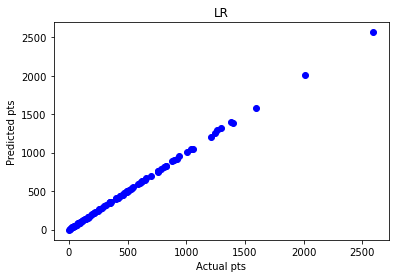

In [90]:
plt.scatter(y_test, pred, color ="blue")
plt.xlabel("Actual pts")
plt.ylabel("Predicted pts")
plt.title("Linear Regression")

# L1,L2

In [80]:
from sklearn.linear_model import Lasso, Ridge
ls = Lasso()
ls.fit(x_train, y_train)

Lasso()

In [81]:
ls_pred = ls.predict(x_test)
ls_pred

array([1.39931406e+02, 6.24431763e+02, 2.58431864e+03, 5.86891734e+02,
       3.47724969e+02, 1.39211010e+03, 2.00415860e+03, 9.38126008e+01,
       7.60362289e+02, 4.95488779e+02, 7.00157818e+00, 7.59235786e+02,
       7.41114820e+01, 6.02798816e+02, 8.08877047e+02, 7.57374683e+02,
       6.60706608e+02, 3.39247037e+01, 9.00128276e+01, 2.68883982e+01,
       4.49658541e+01, 4.48343398e+02, 6.16861402e+02, 7.99705206e+01,
       1.71761430e+02, 2.11982361e+02, 3.89401425e+01, 5.27516770e+02,
       1.60150435e+02, 1.24669698e+03, 9.89883977e+01, 8.22798382e+02,
       6.99736303e+00, 5.38307558e+02, 1.97339447e+02, 1.59442542e+03,
       2.90324135e+01, 1.15757423e+02, 3.53389845e+02, 4.39907121e+01,
       1.62156678e+02, 1.26510025e+03, 1.38035145e+03, 3.42968850e+02,
       9.22868905e+02, 8.24574326e+02, 5.49533909e+01, 2.57778970e+02,
       6.26902406e+02, 4.04801149e+02, 3.50467208e+02, 2.26183240e+02,
       7.70039969e+01, 1.05176528e+03, 6.95850912e+02, 5.11244479e+02,
      

In [84]:
r2_score(y_test, ls_pred)

0.9999901682258031

In [85]:
ls = Lasso(alpha=2)
ls.fit(x_train, y_train)

Lasso(alpha=2)

In [86]:
ls_pred = ls.predict(x_test)

In [87]:
r2_score(y_test, ls_pred)

0.9999648542917011

# Decision TreeRegressor

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [96]:
pred = dt.predict(x_test)

In [97]:
pred

array([ 145.,  638., 2112.,  618.,  378., 1298., 1791.,  100.,  838.,
        588.,    7.,  781.,   83.,  636.,  838.,  721.,  721.,   22.,
         84.,   20.,   38.,  403.,  544.,   92.,  173.,  224.,   47.,
        544.,  159., 1298.,  104.,  779.,    6.,  487.,  201., 1488.,
         25.,  109.,  403.,   63.,  181., 1131., 1291.,  339.,  921.,
        844.,   72.,  257.,  586.,  419.,  339.,  257.,   78., 1107.,
        738.,  490.,  781.,  146.,  399.,   84.,  178.,  490.,  618.,
        298.,  286., 1089.,  990.,  720.,  150.,  530.,  470., 1007.,
        346.,  343.,   11.,  352.,    0.,  401.,  339.,  350.,  201.,
        508., 1095.,   47.,  159.,  378., 1028.,  178.,  137.,  343.,
        573.,  352.,  470.,  399., 1134.,  343.])

In [99]:
r2_score(y_test, pred)

0.9746485420639142